## BoxOffice-Revenue
by Hans Voll

The objective on this study is to accurately predict box office revenue before the release date. This will involve data cleaning, exploration and visualization, and machine learning. The source data for this analysis is located as a dataset on the Kaggle website, and is titled "The Movies" by Rounak Banik. https://www.kaggle.com/rounakbanik/the-movies-dataset


In [1]:
!ls

BoxOffice-Revenue.ipynb links.csv               ratings.csv
credits.csv             links_small.csv         ratings_small.csv
keywords.csv            movies_metadata.csv


In [2]:
import numpy as np
import pandas as pd

dfOrig = pd.read_csv('movies_metadata.csv')
print("original data:")
print(dfOrig.dtypes)
print(dfOrig.shape)

original data:
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
(45466, 24)


/Users/hans/Library/Python/2.7/lib/python/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Select needed columns to reduce DataFrame size
df = dfOrig[['revenue','release_date','runtime','vote_average','vote_count','popularity','title']]
print("selected data:")
print(df.dtypes)

selected data:
revenue         float64
release_date     object
runtime         float64
vote_average    float64
vote_count      float64
popularity       object
title            object
dtype: object


In [4]:
#Filter out values that don't apply
print("original shape:")
print(df.shape)

df = df.dropna()
print("after dropping NaN values:")
print(df.shape)

df = df[df.revenue > 1000000]
print("after dropping low revenue values:")
print(df.shape)

original shape:
(45466, 7)
after dropping NaN values:
(45130, 7)
after dropping low revenue values:
(6052, 7)


In [5]:
#Format date from a string to a dateTime data type 
print("originial time format:")
print(type(df['release_date'][0]))

df['release_date'] = pd.to_datetime(df['release_date'],infer_datetime_format=True)
print("fixed time format:")
print(type(df['release_date'][0]))

originial time format:
<type 'str'>
fixed time format:
<class 'pandas._libs.tslib.Timestamp'>


Explore data with various graphs

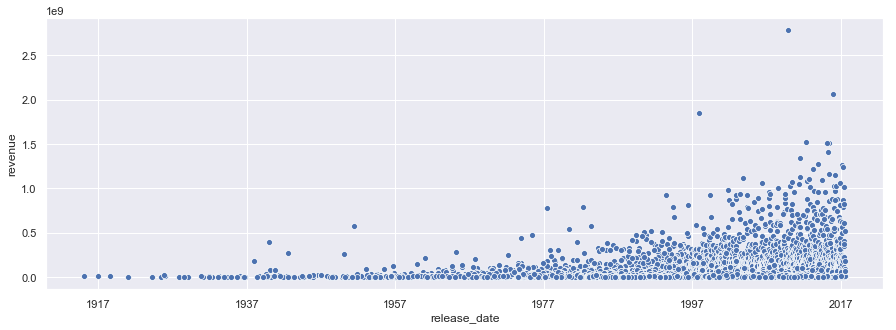

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='release_date', y='revenue', data = df)


plt.show()

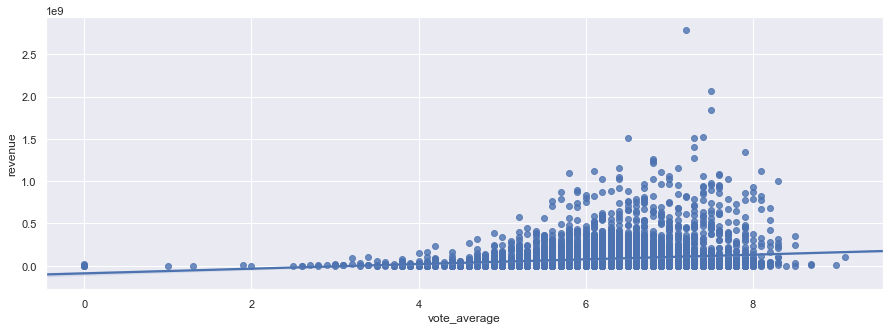

In [7]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_average', y='revenue', data = df)

plt.show()

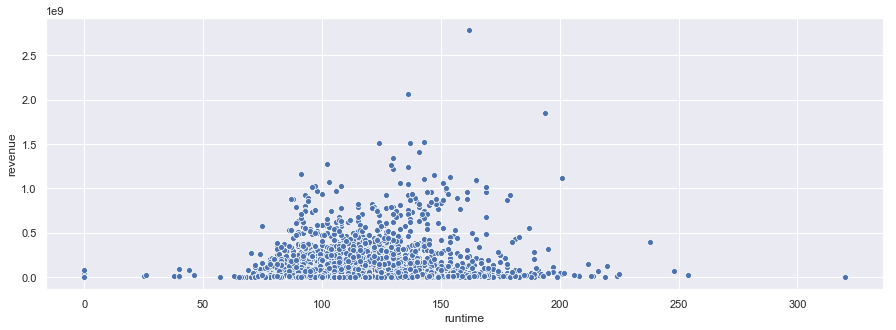

In [8]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='runtime', y='revenue', data = df)

plt.show()

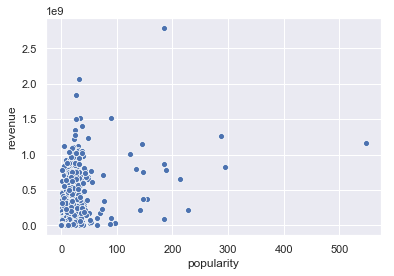

In [9]:
sns.set()
#plt.figure(figsize=(15,5))
sns.scatterplot(x='popularity', y='revenue', data = df)

plt.show()

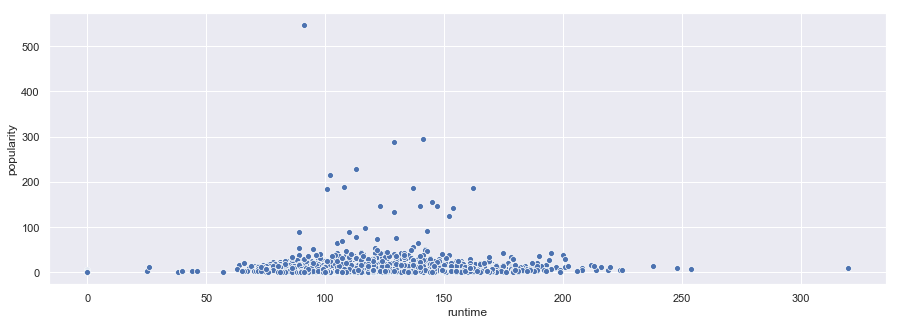

In [10]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='runtime', y='popularity', data = df)

plt.show()

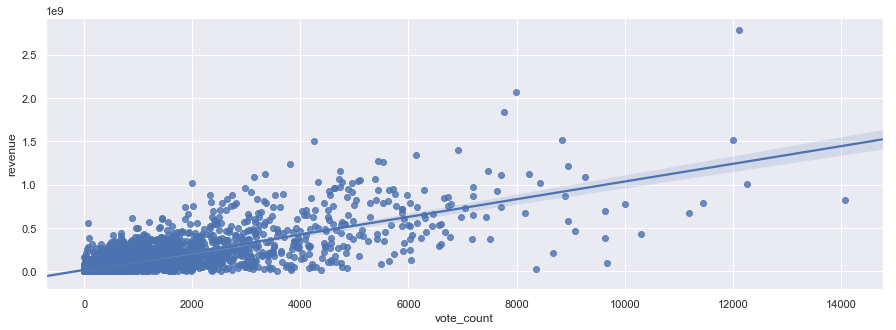

In [11]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_count', y='revenue', data = df)

plt.show()

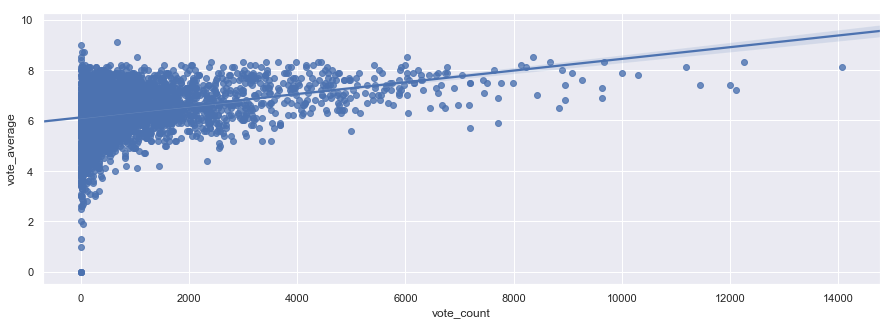

In [12]:
sns.set()
plt.figure(figsize=(15,5))
sns.regplot(x='vote_count', y='vote_average', data = df)

plt.show()

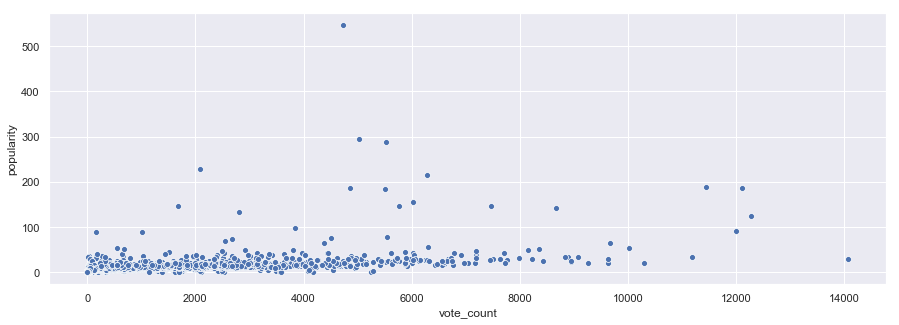

In [13]:
sns.set()
plt.figure(figsize=(15,5))
sns.scatterplot(x='vote_count', y='popularity', data = df)

plt.show()

In [14]:
y = df.revenue
features = ['vote_count','vote_average']
X = df[features]

In [15]:
from sklearn.tree import DecisionTreeRegressor
revenue_model = DecisionTreeRegressor(random_state=1)
revenue_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [16]:
print("predicting first 25 movies:")
print(X.head(25))
print("Predictions are $$$..")
print(revenue_model.predict(X.head(25)))

predicting first 25 movies:
    vote_count  vote_average
0       5415.0           7.7
1       2413.0           6.9
3         34.0           6.1
4        173.0           5.7
5       1886.0           7.7
8        174.0           5.5
9       1194.0           6.6
10       199.0           6.5
12       423.0           7.1
13        72.0           7.1
14       137.0           5.7
15      1343.0           7.8
16       364.0           7.2
17       539.0           6.5
18      1128.0           6.1
19       224.0           5.4
20       305.0           6.4
22       394.0           6.0
24       365.0           7.1
26        91.0           6.6
28       308.0           7.6
30       249.0           6.4
31      2470.0           7.4
33       756.0           6.0
35       350.0           7.3
Predictions are $$$..
[  3.73554033e+08   2.62797249e+08   8.14521560e+07   7.65789110e+07
   1.87436818e+08   9.20341870e+07   3.52194034e+08   1.07879496e+08
   1.13483240e+07   9.07088250e+06   1.00173220e+07   1.16

In [17]:
df['title'].head(25)

0                          Toy Story
1                            Jumanji
3                  Waiting to Exhale
4        Father of the Bride Part II
5                               Heat
8                       Sudden Death
9                          GoldenEye
10            The American President
12                             Balto
13                             Nixon
14                  Cutthroat Island
15                            Casino
16             Sense and Sensibility
17                        Four Rooms
18    Ace Ventura: When Nature Calls
19                       Money Train
20                        Get Shorty
22                         Assassins
24                 Leaving Las Vegas
26                      Now and Then
28         The City of Lost Children
30                   Dangerous Minds
31                    Twelve Monkeys
33                              Babe
35                  Dead Man Walking
Name: title, dtype: object